# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score, roc_curve,auc
from sklearn.decomposition import PCA

# Importing Dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Encoding Categorical Values

In [4]:
categorical_column = ['Attrition', 'BusinessTravel', 'Department','Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)

# Seperating into X and y

In [5]:
y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)

In [6]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42,replacement=True)
X_, Y1 = rus.fit_resample(X,y)
X1 = pd.DataFrame(X_,columns=X.columns)

ros = RandomOverSampler(random_state=42)
X_, Y2 = ros.fit_resample(X,y)
X2 = pd.DataFrame(X_,columns=X.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

# UnderSampling

In [7]:
X=X1
y=Y1

# Spliting into Train and Test Sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Feature Scaling

PCA

20 PCs explain  [70.74068688 99.76281581] % of variance cumulatively


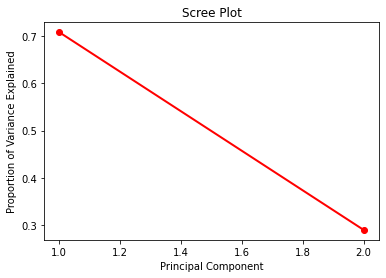

In [9]:
pca = PCA(n_components=2, random_state=0)
X_train_pca = pca.fit_transform(X_train)
print('20 PCs explain ', np.cumsum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

Standardization

20 PCs explain  [17.44555167 24.44074193 30.65901903 36.38446522 41.40488981 46.19338821
 50.24580214 54.14136646 57.92204534 61.55864087 65.17124382 68.54778693
 71.79236823 74.88825386 77.83767848 80.70137862 83.37833712 85.93647278
 88.25925916 90.54980649] % of variance cumulatively


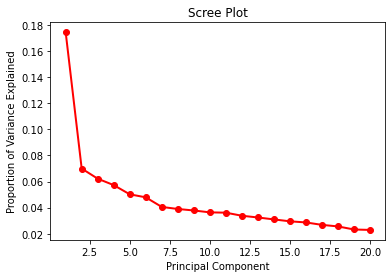

In [10]:
standard_scaler = StandardScaler()

pca_std = PCA(n_components=20, random_state=0)
X_train_standardized = pca_std.fit_transform(standard_scaler.fit_transform(X_train))
print('20 PCs explain ', np.cumsum(pca_std.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca_std.n_components_) + 1
plt.plot(PC_values, pca_std.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
X_test_standardized = pca_std.transform(standard_scaler.transform(X_test))

X_standardized = pca_std.transform(standard_scaler.fit_transform(X))

Normalization

17 PCs explain  [11.52097344 20.44330143 28.67985327 36.31753724 42.61134166 48.23334781
 53.36701768 58.09955124 62.64094633 66.81234597 70.37901588 73.84498837
 77.15158301 79.93520506 82.65007667 85.17122704 87.59414783] % of variance cumulatively


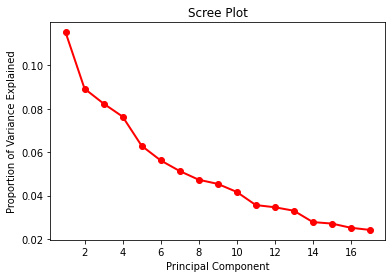

In [11]:
min_max_scaler = MinMaxScaler()

pca_norm = PCA(n_components=17, random_state=0)
X_train_normalized = pca_norm.fit_transform(min_max_scaler.fit_transform(X_train))
print('17 PCs explain ', np.cumsum(pca_norm.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca_norm.n_components_) + 1
plt.plot(PC_values, pca_norm.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
X_test_normalized = pca_norm.transform(min_max_scaler.transform(X_test))

X_normalized = pca_norm.transform(min_max_scaler.fit_transform(X))

Full datasets

In [12]:
X_train = X_train_pca
X_test = pca.transform(X_test)
X = pca.transform(X)

# Hyperparameter tuning using GridSearchCV

In [13]:
def tune_hyperparameters(model,X,y):
  param_grid = {
      'activation' : ['identity','logistic','tanh','relu'],
      'solver': ['lbfgs','sgd','adam'],
      'alpha': [0.0001,0.05]
  }
  grid_search = GridSearchCV(model,param_grid=param_grid)
  grid_search.fit(X,y)
  print("Best Params: ",grid_search.best_params_)
  return grid_search.best_params_

### With Standardization

In [14]:
best_parameters_std = tune_hyperparameters(MLPClassifier(random_state=0,max_iter=100000),X_train_standardized,y_train)

Best Params:  {'activation': 'relu', 'alpha': 0.0001, 'solver': 'adam'}


### With Normalization

In [15]:
best_parameters_norm = tune_hyperparameters(MLPClassifier(random_state=0,max_iter=100000),X_train_normalized,y_train)

Best Params:  {'activation': 'identity', 'alpha': 0.0001, 'solver': 'sgd'}


# MLP Classifier

In [16]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred))
  print("Recall: ",recall_score(y_test,y_pred))
  print("F1 Score: ",f1_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

  
  fpr,tpr,thresholds = roc_curve(y_test,y_pred)
  plt.plot(fpr, tpr,color='green',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.show()

### Without Scaling

Accuracy:  0.5804195804195804
Precision:  0.6363636363636364
Recall:  0.4666666666666667
F1 Score:  0.5384615384615385
Confusion Matrix:
 [[48 20]
 [40 35]]


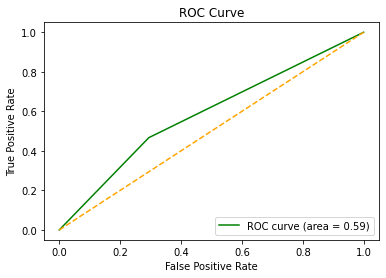

In [17]:
train_predict_evaluate(MLPClassifier(max_iter=100000,random_state=0),X_train,y_train,X_test)

### With Standardization

Accuracy:  0.7132867132867133
Precision:  0.7575757575757576
Recall:  0.6666666666666666
F1 Score:  0.7092198581560282
Confusion Matrix:
 [[52 16]
 [25 50]]


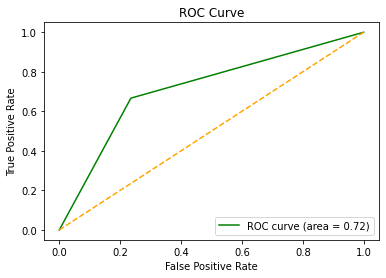

In [18]:
train_predict_evaluate(MLPClassifier(max_iter=100000,random_state=0,**best_parameters_std),X_train_standardized,y_train,X_test_standardized)

### With Normalization

Accuracy:  0.7272727272727273
Precision:  0.7571428571428571
Recall:  0.7066666666666667
F1 Score:  0.7310344827586207
Confusion Matrix:
 [[51 17]
 [22 53]]


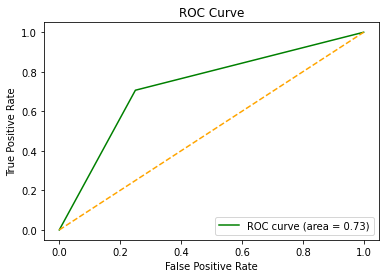

In [19]:
train_predict_evaluate(MLPClassifier(max_iter=100000,random_state=0,**best_parameters_norm),X_train_normalized,y_train,X_test_normalized)

# K-Fold Cross Validation

In [20]:
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  metrics = []
  metrics.append(np.mean(scores['test_accuracy']))
  metrics.append(np.mean(scores['test_precision']))
  metrics.append(np.mean(scores['test_recall']))
  metrics.append(np.mean(scores['test_f1']))

  print("Accuracy: ",metrics[0])
  print("Precision: ",metrics[1])
  print("Recall: ",metrics[2])
  print("F1 Score: ",metrics[3])

  return metrics

In [21]:
metrics = []

### Without Scaling

In [22]:
metrics.append(cross_validation(MLPClassifier(max_iter=100000,random_state=0),X,y))

Accuracy:  0.5590593505039194
Precision:  0.5601206335535287
Recall:  0.6413120567375887
F1 Score:  0.58831725624977


### With Standardization

In [23]:
metrics.append(cross_validation(MLPClassifier(max_iter=100000,random_state=0,**best_parameters_std),X_standardized,y))

Accuracy:  0.7151847704367301
Precision:  0.720088490401216
Recall:  0.7046099290780142
F1 Score:  0.7119511832103094


In [24]:
metrics.append(cross_validation(MLPClassifier(max_iter=100000,random_state=0,**best_parameters_norm),X_normalized,y))

Accuracy:  0.6897648376259798
Precision:  0.700606807415318
Recall:  0.6756205673758865
F1 Score:  0.6843676503696716


# Performance and Comparison Plots

In [25]:
mdf = pd.DataFrame(metrics,columns=["Accuracy","Precision","Recall","F1 Score"],index=["Without Scaling","With Standardization","With Normalization"])
mdf.head()

,Accuracy,Precision,Recall,F1 Score
Without Scaling,0.559059,0.560121,0.641312,0.588317
With Standardization,0.715185,0.720088,0.704610,0.711951
With Normalization,0.689765,0.700607,0.675621,0.684368


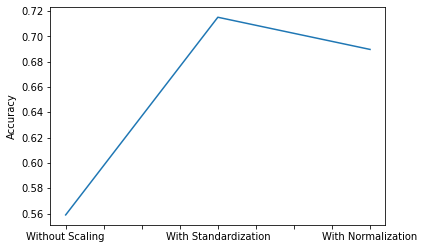

In [26]:
mdf['Accuracy'].plot()
plt.ylabel("Accuracy")
plt.show()

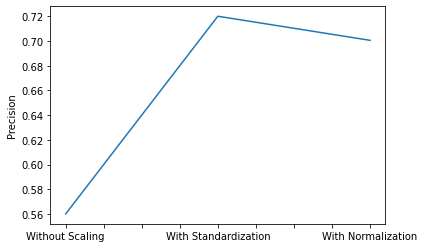

In [27]:
mdf['Precision'].plot()
plt.ylabel("Precision")
plt.show()

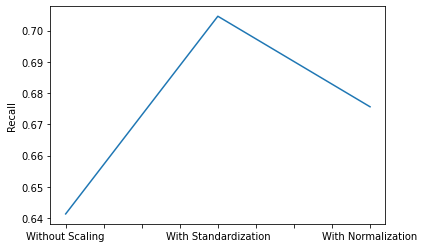

In [28]:
mdf['Recall'].plot()
plt.ylabel("Recall")
plt.show()

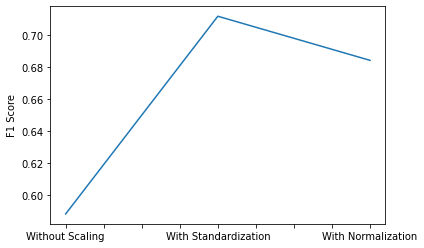

In [29]:
mdf['F1 Score'].plot()
plt.ylabel("F1 Score")
plt.show()

# Oversampling


In [30]:
X=X2
y=Y2

# Spliting into Train and Test Sets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Feature Scaling

PCA

20 PCs explain  [72.0048171  99.77248109] % of variance cumulatively


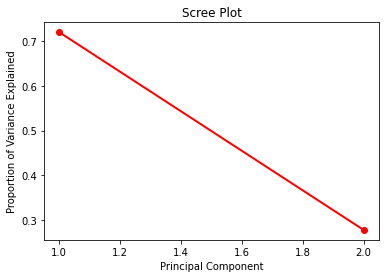

In [32]:
pca = PCA(n_components=2, random_state=0)
X_train_pca = pca.fit_transform(X_train)
print('20 PCs explain ', np.cumsum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

Standardization

20 PCs explain  [16.64465197 23.58747178 29.84784841 35.39372339 40.35079016 44.67005664
 48.56277173 52.35230055 56.02047014 59.61604873 63.08993843 66.47912883
 69.75557924 72.92265112 75.95912735 78.92913152 81.82658034 84.6202276
 87.25717622 89.81093824] % of variance cumulatively


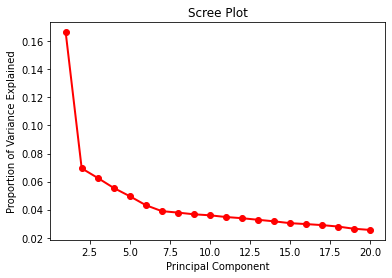

In [33]:
standard_scaler = StandardScaler()

pca_std = PCA(n_components=20, random_state=0)
X_train_standardized = pca_std.fit_transform(standard_scaler.fit_transform(X_train))
print('20 PCs explain ', np.cumsum(pca_std.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca_std.n_components_) + 1
plt.plot(PC_values, pca_std.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
X_test_standardized = pca_std.transform(standard_scaler.transform(X_test))

X_standardized = pca_std.transform(standard_scaler.fit_transform(X))

Normalization

17 PCs explain  [ 9.99039652 19.50265107 27.87547577 34.91437668 41.54863366 47.16013872
 52.37699663 57.42392261 61.95387303 65.91516331 69.62470578 73.16976549
 76.20145628 79.04762956 81.82726103 84.41792803 86.85682217] % of variance cumulatively


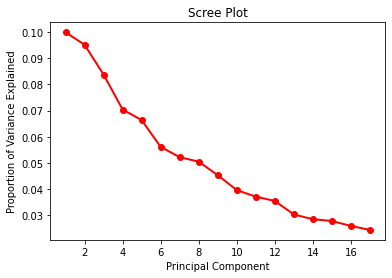

In [34]:
min_max_scaler = MinMaxScaler()

pca_norm = PCA(n_components=17, random_state=0)
X_train_normalized = pca_norm.fit_transform(min_max_scaler.fit_transform(X_train))
print('17 PCs explain ', np.cumsum(pca_norm.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca_norm.n_components_) + 1
plt.plot(PC_values, pca_norm.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
X_test_normalized = pca_norm.transform(min_max_scaler.transform(X_test))

X_normalized = pca_norm.transform(min_max_scaler.fit_transform(X))

Full datasets

In [35]:
X_train = X_train_pca
X_test = pca.transform(X_test)
X = pca.transform(X)

# Hyperparameter tuning using GridSearchCV

In [36]:
def tune_hyperparameters(model,X,y):
  param_grid = {
      'activation' : ['identity','logistic','tanh','relu'],
      'solver': ['lbfgs','sgd','adam'],
      'alpha': [0.0001,0.05]
  }
  grid_search = GridSearchCV(model,param_grid=param_grid)
  grid_search.fit(X,y)
  print("Best Params: ",grid_search.best_params_)
  return grid_search.best_params_

### With Standardization

In [37]:
best_parameters_std = tune_hyperparameters(MLPClassifier(random_state=0,max_iter=100000),X_train_standardized,y_train)

Best Params:  {'activation': 'logistic', 'alpha': 0.05, 'solver': 'lbfgs'}


### With Normalization

In [38]:
best_parameters_norm = tune_hyperparameters(MLPClassifier(random_state=0,max_iter=100000),X_train_normalized,y_train)

Best Params:  {'activation': 'relu', 'alpha': 0.05, 'solver': 'lbfgs'}


# MLP Classifier

In [39]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred))
  print("Recall: ",recall_score(y_test,y_pred))
  print("F1 Score: ",f1_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

  
  fpr,tpr,thresholds = roc_curve(y_test,y_pred)
  plt.plot(fpr, tpr,color='green',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.show()

### Without Scaling

Accuracy:  0.4891891891891892
Precision:  0.5186046511627908
Recall:  0.565989847715736
F1 Score:  0.5412621359223302
Confusion Matrix:
 [[139 207]
 [171 223]]


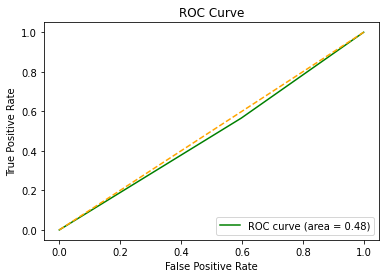

In [40]:
train_predict_evaluate(MLPClassifier(max_iter=100000,random_state=0),X_train,y_train,X_test)

### With Standardization

Accuracy:  0.9472972972972973
Precision:  0.9137529137529138
Recall:  0.9949238578680203
F1 Score:  0.9526123936816525
Confusion Matrix:
 [[309  37]
 [  2 392]]


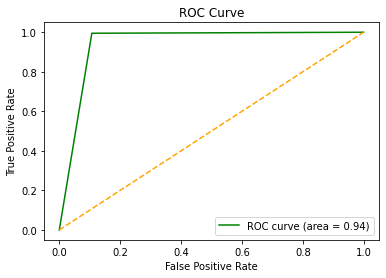

In [41]:
train_predict_evaluate(MLPClassifier(max_iter=100000,random_state=0,**best_parameters_std),X_train_standardized,y_train,X_test_standardized)

### With Normalization

Accuracy:  0.9418918918918919
Precision:  0.9053117782909931
Recall:  0.9949238578680203
F1 Score:  0.9480048367593712
Confusion Matrix:
 [[305  41]
 [  2 392]]


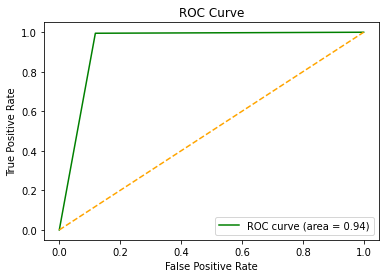

In [42]:
train_predict_evaluate(MLPClassifier(max_iter=100000,random_state=0,**best_parameters_norm),X_train_normalized,y_train,X_test_normalized)

# K-Fold Cross Validation

In [43]:
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  metrics = []
  metrics.append(np.mean(scores['test_accuracy']))
  metrics.append(np.mean(scores['test_precision']))
  metrics.append(np.mean(scores['test_recall']))
  metrics.append(np.mean(scores['test_f1']))

  print("Accuracy: ",metrics[0])
  print("Precision: ",metrics[1])
  print("Recall: ",metrics[2])
  print("F1 Score: ",metrics[3])

  return metrics

In [44]:
metrics = []

### Without Scaling

In [45]:
metrics.append(cross_validation(MLPClassifier(max_iter=100000,random_state=0),X,y))

Accuracy:  0.5746023273193125
Precision:  0.5698306449491173
Recall:  0.659556959942069
F1 Score:  0.6019999454048509


### With Standardization

In [46]:
metrics.append(cross_validation(MLPClassifier(max_iter=100000,random_state=0,**best_parameters_std),X_standardized,y))

Accuracy:  0.9464650861042448
Precision:  0.9052412435955686
Recall:  0.9983805668016196
F1 Score:  0.9493141216536927


In [47]:
metrics.append(cross_validation(MLPClassifier(max_iter=100000,random_state=0,**best_parameters_norm),X_normalized,y))

Accuracy:  0.9383564231220897
Precision:  0.8910973846480219
Recall:  0.9991902834008097
F1 Score:  0.9419698217262056


# Performance and Comparison Plots

In [48]:
mdf = pd.DataFrame(metrics,columns=["Accuracy","Precision","Recall","F1 Score"],index=["Without Scaling","With Standardization","With Normalization"])
mdf.head()

,Accuracy,Precision,Recall,F1 Score
Without Scaling,0.574602,0.569831,0.659557,0.602000
With Standardization,0.946465,0.905241,0.998381,0.949314
With Normalization,0.938356,0.891097,0.999190,0.941970


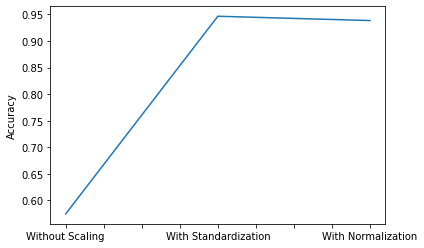

In [49]:
mdf['Accuracy'].plot()
plt.ylabel("Accuracy")
plt.show()

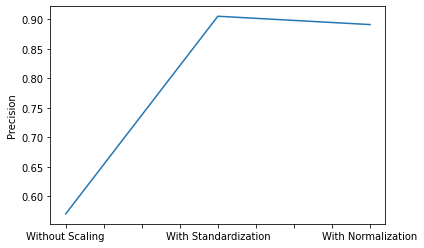

In [50]:
mdf['Precision'].plot()
plt.ylabel("Precision")
plt.show()

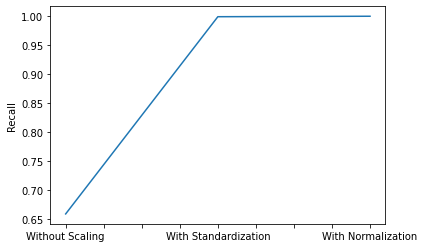

In [51]:
mdf['Recall'].plot()
plt.ylabel("Recall")
plt.show()

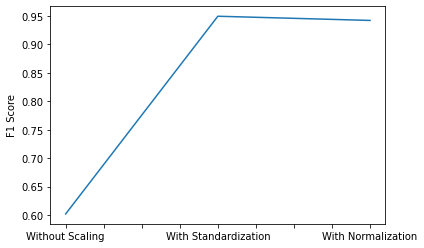

In [52]:
mdf['F1 Score'].plot()
plt.ylabel("F1 Score")
plt.show()